In [412]:
from scipy.stats import expon
from scipy import special
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from scipy.stats import t

def CrawfordTest(case, controls):
    """ Implementation of Crawford and Howell (1998; The Clinical Neuropsychologist) test to compare an individual to a sample.

    Args:
      case : score of the individual
      controls : scores of from a sample group

    Return:
      the one-tail probability associated to the score 'case' compared to the scores in the list 'controls'
    """
    if np.std(controls,ddof=1) == 0:
        tobs = case - np.mean(controls)
    else:
        tobs = (case - np.mean(controls)) / np.std(controls, ddof=1)
        
    if tobs >= 0:
        return (1 - t.cdf(tobs, len(controls) - 1))
    else:
        return t.cdf(tobs, len(controls) - 1)

#need to calculate real percentages off of this info instead of what we are already using
#what percentile does GPT answer in for each one?

def GenerateDistributions(df):
    for index, row in df.iterrows():
        mean = row['Humans Continuous']
        std = row['SD']
        case = row['GPT Continuous Temp 0']
        
        if std == 0:
            min_in_standard_domain = (min_value - mean)
            max_in_standard_domain = (max_value - mean)
        else:
            min_in_standard_domain = (min_value - mean) / std
            max_in_standard_domain = (max_value - mean) / std
    
        min_in_erf_domain = special.erf(min_in_standard_domain)
        max_in_erf_domain = special.erf(max_in_standard_domain)
    
        random_uniform_data = np.random.uniform(min_in_erf_domain, max_in_erf_domain, 10000)
        random_gaussianized_data = (special.erfinv(random_uniform_data) * std) + mean
    
#        random_gaussianized_data = np.around(random_gaussianized_data,0)
    
        df.at[index, 'Distribution'] = random_gaussianized_data
    
        CrawfordTest(case, random_gaussianized_data)
        
#         fig, axes = plt.subplots(1, 1, figsize=(6, 3))
#         axes.hist(random_gaussianized_data, 20, range=(0,4))
#         axes.set_title(row[0])
#         plt.axvline(x=case, color='r')
# #     plt.axvline(x=row['GPT Continuous Temp .5'], color='y')
# #     plt.axvline(x=row['GPT Continuous Temp 1'], color='c')
#         plt.savefig(row[0]+'.png')
#         plt.show()
    
        all_pairs_and_pvalues.update({row[0]:CrawfordTest(case, random_gaussianized_data)})
    
        if CrawfordTest(case, random_gaussianized_data) < p_value:
            significant_pairs.update({row[0]:CrawfordTest(case, random_gaussianized_data)})
            continue
        else:
            pass
    
        print(row[0], CrawfordTest(case, random_gaussianized_data))

# #print(all_pairs_and_pvalues)
# all_words_and_measures_short

In [424]:
#import and create cleaned stimuli strings which can be copied directly into GPT if desired
#find difference score between human ratings (Graves 2013) and GPTv3.5 (March 14)

home_direct = 'C:/Users/Nick/Downloads/meat-kangaroo-main/'

all_words_and_measures = pd.read_csv(home_direct + 'graves_with_vecs.csv', skipinitialspace=True, )
all_words_and_measures = all_words_and_measures.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

all_words_and_measures['Humans Binary'] = np.where(
    all_words_and_measures['Humans Continuous'] >= 2.5, 'Makes Sense', np.where(
    all_words_and_measures['Humans Continuous'] <= 1.5, 'Nonsense', 'Ambiguous'))

#all_words_and_measures['Stim'] = 'the ' + all_words_and_measures['Stim'].str.replace('-', ' ') + '.'
all_words_and_measures['Difference Score'] = abs(all_words_and_measures['Humans Continuous'] - all_words_and_measures['GPT Continuous Temp 0'])

all_words_and_measures_short = all_words_and_measures.head(25)

# all_words_and_measures.to_excel('cleaned_words.xlsx')

In [419]:
p_value = .001

min_value = 0
max_value = 4
all_pairs_and_pvalues = {}
significant_pairs = {}

all_words_and_measures['Distribution'] = ''

GenerateDistributions(all_words_and_measures)

print('#########')
print(significant_pairs)
print('#############')
print('Number of significant pairs: ', len(significant_pairs))

#all_words_and_measures

the dog puppy. 0.003494715050479047
the dress summer. 0.13340607118661607
the boot car. 0.023381875794876827
the pig truck. 0.47845165631369624
the boy cabin. 0.005712792723124416
the heart guy. 0.07990524488111861
the helmet mirror. 0.30955625515237895
the field square. 0.25357842288107046
the pen pig. 0.15823293010967676
the bike barn. 0.30560339097378786
the car clown. 0.018579676087118302
the flag rainbow. 0.030299669785802674
the juice pickle. 0.07957288829146925
the tennis star. 0.02276363168075507
the beach summer. 0.2683456979429871
the dime bag. 0.15705521495507158
the sword cane. 0.09317557484778627
the sky rocket. 0.24343173202846552
the tree snow. 0.19881771485473565
the alcohol blood. 0.024116383049499257
the kitchen restaurant. 0.2929479145513676
the door stage. 0.008607294532015586
the tree orange. 0.012283461493100223
the pig pet. 0.17276297781000083
the leg bird. 0.07117311729737641
the ocean swimming. 0.09491878609899462
the rocket guy. 0.3045858236452257
the door bar

the umbrella tent. 0.03320390100866599
the jail house. 0.1910929284678155
the trash bag. 0.02276363168075507
the river sand. 0.28844068466149153
the brick road. 0.12407959452353848
the sugar plant. 0.44388770280931
the gym rat. 0.059743344507650224
the water tower. 0.1586673533751288
the prison clothes. 0.1882514311307204
the money cigarette. 0.012085393444643988
the police radio. 0.21033974957427665
the dish candy. 0.294249763339685
the hospital building. 0.06631186758294108
the raspberry peach. 0.19563913883526718
the pigeon rock. 0.019484845417215957
the vehicle key. 0.14767331192793595
the lion mountain. 0.06619331305529996
the flour potato. 0.008263735314571474
the infant seat. 0.18554150108212603
the book magazine. 0.002843458014438305
the bus field. 0.015486071692600745
the holiday bird. 0.18534386606977904
the plum sugar. 0.1081138266340782
the ship building. 0.06833658555825994
the prince crown. 0.058744793207909374
the banana pie. 0.03681606263350979
the baby book. 0.01363493

the bread flour. 0.31450012336954103
the typewriter key. 0.49572200394288707
the door key. 0.4080457244864637
the lemon grass. 0.1402566542382322
the magazine plant. 0.0018055312793496814
the chess book. 0.4001591224596177
the refrigerator door. 0.1586673533751288
the clothes summer. 0.002957989026418195
the shoe tennis. 0.026692859335005203
the kitchen window. 0.06989127019195725
the baby picture. 0.1251420701358245
the summer bike. 0.21681557351270309
the book worm. 0.029546214628726114
the brick home. 0.018806616080784752
the milk breast. 0.004802491509005802
the door cage. 0.0021169011176250807
the milk crate. 0.1586673533751288
the ship star. 0.004081574260957455
the bag gym. 0.021803615857639125
the ball fire. 0.0032081661249833138
the lizard queen. 0.4840913363207662
the gold banana. 0.2515853628984781
the cocktail umbrella. 0.4226481489592958
the tea bag. 0.1586673533751288
the field ice. 0.06130960180654488
the prince blood. 0.19778793968124098
the gold honey. 0.46569008143228

the bag body. 0.09788084683882814
the summer hurricane. 0.04539691315598474
the bulb onion. 0.02370573653286623
the nut milk. 0.2191747283195249
the peach juice. 0.06999132953946807
the potato pie. 0.054854419523626574
the shepherd boy. 0.07263139829581267
the forest fire. 0.5
the sheep field. 0.02961013487340791
the pill bottle. 0.08028208927204994
the strawberry plant. 0.061930250350089144
the screen star. 0.018186618957153677
the goat mountain. 0.00791412159004401
the leg jeans. 0.13885514482643657
the cat engine. 0.02055213874702788
the pet owl. 0.06533559083665152
the water plant. 0.013686736911857844
the bowl lid. 0.03520748297940468
the police dog. 0.5
the building brick. 0.017376291232929497
the kitchen door. 0.08158094378268943
the bird seat. 0.19732158708755076
the school library. 0.5
the chimp mother. 0.048279171867595005
the lizard tongue. 0.059590156949039574
the flag ship. 0.028135749020982703
the milk door. 0.08224478981778727
the clown school. 0.06928971106867232
the do

the boy trash. 0.09676931172912673
the gold leaf. 0.06981836282536036
the body clock. 0.40738226120868026
the street clothes. 0.07469783651846162
the ball yarn. 0.16175377750219855
the hospital refrigerator. 0.07027719624273654
the snow cave. 0.06159413524003954
the mother dog. 0.05818137885097596
the field guy. 0.27721085829352365
the coffee house. 0.5
the police star. 0.4919622205191493
the bowl fire. 0.0026063584222818514
the cab dollar. 0.3109580065459612
the water ski. 0.08357805612552094
the hotel pool. 0.07927014818972788
the ice bullet. 0.01593685549290602
the infant milk. 0.25173082853907897
the mountain goat. 0.5
the rock cafe. 0.44744430503992794
the mountain ice. 0.0547359840649726
the blood soup. 0.15275358420255358
the water pill. 0.2804767771574035
the boy coffee. 0.002181981536569344
the pen bull. 0.03725328012145113
the jeans leg. 0.18138923291139286
the bag trash. 0.06410745783965233
the hospital pants. 0.33897522264097063
the tongue butt. 0.08342198651910342
the pet 

the corn flour. 0.4557016827686138
the cloud smoke. 0.29827158865549164
the rib cage. 0.007100639399363096
the field water. 0.13604984746924764
the snow tree. 0.03306298556767062
the door cat. 0.08969725846101329
the surgeon hospital. 0.013189905226494436
the snow nose. 0.04986883750750715
the ski jacket. 0.1586673533751288
the bike cop. 0.4537731549994413
the apple butter. 0.2896971929442156
the building railroad. 0.006245373358061079
the moose gun. 0.26816142820087174
the vehicle police. 0.02322078738248612
the horse milk. 0.08307018778551356
the home brick. 0.05211033322789249
the winter ice. 0.003475172651525282
the farmer star. 0.049844707010500255
the army hospital. 0.07195638845833652
the summer beard. 0.41269275899966673
the field home. 0.3849196683469962
the radio guy. 0.016046482990725454
the jacket book. 0.1299825827799037
the tower water. 0.227466580007482
the boy nurse. 0.10592302009624888
the book log. 0.3292744023194195
the zipper teeth. 0.4813527214048594
the road shoe.

the stove home. 0.14428880515913334
the engine cat. 0.2814662319540392
the bus home. 0.45392006992378897
the earth star. 0.08961883576600949
the face rat. 0.3730612322557154
the pea dwarf. 0.08944134792385772
the orange juice. 0.1586673533751288
the home cab. 0.02924075556670036
the square log. 0.4765682598145139
the bird foot. 0.001252011625587744
the vehicle field. 0.03758674349178459
the pool sun. 0.06853263680577237
the school sword. 0.04986635958928143
the engine fire. 0.21500135767261003
the pants clown. 0.0035887491694509555
the flea circus. 0.18961025725427022
the tights ski. 0.003394140308775939
the forest lake. 0.2022770810101252
the cat skin. 0.009005904377670423
the girl juice. 0.010598747377818296
the duck pond. 0.04415874858650685
the house money. 0.43545516055100486
the orange tree. 0.19487723715645794
the bell gold. 0.0019747438646798843
the crate door. 0.36552769865052104
the bottle vodka. 0.10534932639697403
the water foot. 0.02342882671412505
the valley river. 0.2098

In [381]:
remove_middle = all_words_and_measures[all_words_and_measures['Humans Binary'].isin(['Makes Sense', 'Nonsense'])]

# for index, row in all_words_and_measures.iterrows():
#     print(int(index))
# all_words_and_measures['Distribution'][0]

remove_middle

,Stim,GPT Temp 0,GPT Temp .5,GPT Temp 1,GPT Continuous Temp 0,GPT Continuous Temp .5,GPT Continuous Temp 1,Class,Humans Continuous,SD,...,Logw1frq,Logw2frq,Logwordfrq_sum,pairs,Word2Vec,GloVe,Taxonomic,Humans Binary,Difference Score,Distribution
1,the baby teeth.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,3.82,0.48,...,3.52,3.14,6.66,baby teeth,0.202178,0.313774,0.375739,Makes Sense,1.82,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 4.0, ..."
2,the dress summer.,Makes Sense,Makes Sense,Makes Sense,2,2,2,-1,1.00,1.24,...,3.18,3.34,6.52,dress summer,0.094827,0.213653,0.126392,Nonsense,1.00,"[1.0, 0.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ..."
3,the boot car.,Nonsense,Nonsense,Nonsense,2,1,2,-1,0.71,0.98,...,2.20,3.69,5.90,boot car,0.223294,0.163418,0.444087,Nonsense,1.29,"[0.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ..."
5,the boy cabin.,Nonsense,Nonsense,Nonsense,2,2,2,-1,0.62,0.86,...,3.59,2.69,6.27,boy cabin,0.096216,0.189663,0.215480,Nonsense,1.38,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
6,the heart guy.,Makes Sense,Makes Sense,Makes Sense,2,2,2,1,1.00,1.02,...,3.41,2.67,6.08,heart guy,0.171251,0.249808,0.310693,Nonsense,1.00,"[1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the goat cheese.,Makes Sense,Makes Sense,Makes Sense,3,2,3,1,3.83,0.76,...,2.32,2.70,5.02,goat cheese,0.317911,0.606518,0.427718,Makes Sense,0.83,"[4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
2156,the sand beach.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,2.68,1.25,...,2.98,3.03,6.00,sand beach,0.520518,0.468190,0.487241,Makes Sense,0.68,"[1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, ..."
2157,the mouth pig.,Makes Sense,Makes Sense,Makes Sense,1,1,2,-1,0.29,0.60,...,3.38,2.51,5.89,mouth pig,0.314613,0.395392,0.279621,Nonsense,0.71,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
2158,the field flower.,Makes Sense,Makes Sense,Makes Sense,2,2,3,-1,2.70,1.46,...,3.37,2.70,6.06,field flower,0.124187,0.124687,0.296407,Makes Sense,0.70,"[3.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 2.0, 3.0, ..."


In [137]:
p_value = .05

min_value = 0
max_value = 4
all_pairs_and_pvalues = {}
significant_pairs = {}

remove_middle['Distribution'] = ''

GenerateDistributions(remove_middle)

print('#########')
print(significant_pairs)
print('#############')
print('Number of significant pairs: ', len(significant_pairs))

C:\Users\Nick\AppData\Local\Temp\ipykernel_16980\294921397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_middle['Distribution'] = ''


the dress summer. 0.15879468265858088
the heart guy. 0.10669782845467402
the helmet mirror. 0.3138746018123135
the field square. 0.25942787480197405
the pen pig. 0.17894327235887664
the bike barn. 0.3218801565740246
the flag rainbow. 0.050393080519483546
the juice pickle. 0.09944307821372145
the beach summer. 0.2831685033005724
the dime bag. 0.17408474521938833
the sword cane. 0.1098155548729085
the sky rocket. 0.2524685884544927
the tree snow. 0.2188661327306114
the pig pet. 0.18736674274285992
the leg bird. 0.0909923011837479
the rocket guy. 0.3142122579965059
the door barn. 0.23895025951405247
the oven home. 0.0925752662969982
the toe nail. 0.06990152689261452
the skin banana. 0.07129947351871024
the winter wolf. 0.1628112474398224
the book jacket. 0.21015638854241753
the rock pet. 0.33831043277441575
the clothes police. 0.31573318827329744
the book baby. 0.14464183890979476
the duck meat. 0.08974311871798991
the island sand. 0.07577122284372483
the tomato salad. 0.39060979668764295

the plant magazine. 0.34770276885889584
the hay field. 0.3856948466056269
the cottage cheese. 0.12877324055064124
the sled dog. 0.3136525020718641
the mountain lion. 0.10317036151014805
the mountain cave. 0.07684072339604593
the face sheet. 0.2582407560298754
the onion soup. 0.1586673533751288
the police school. 0.25506145264333774
the ape body. 0.22781918432594894
the ice mountain. 0.4620824889339633
the vehicle radio. 0.4526559878766757
the pool water. 0.35376853307536366
the vehicle engine. 0.4956602344337683
the dog picture. 0.4678930234921217
the midnight cop. 0.40458541123466585
the crib sheet. 0.2572935007765904
the bell tower. 0.1586673533751288
the bread flour. 0.3343720659857732
the typewriter key. 0.4851706239449837
the door key. 0.42384195523836654
the chess book. 0.4268882930031621
the refrigerator door. 0.1586673533751288
the kitchen window. 0.1283233627425258
the baby picture. 0.18243517423956968
the book worm. 0.09193392861386467
the brick home. 0.08127497583975869
the 

the holiday home. 0.07415091092894444
the nut car. 0.05880105489139653
the lemon pepper. 0.05835674523352019
the home television. 0.10641054548669027
the library book. 0.5
the tree house. 0.38087059805660084
the railroad building. 0.052290225016175085
the onion bulb. 0.07046562762162989
the school book. 0.25070288029248644
the cop street. 0.056025827993691046
the fire engine. 0.22029824602510084
the chicken rib. 0.06799153182171436
the knee pants. 0.22509505851722544
the pendulum clock. 0.17683620126113242
the knee cap. 0.1916267900511106
the brick fireplace. 0.37651255655576543
the tennis queen. 0.050194999285902875
the pine forest. 0.4910785614921297
the cap field. 0.06409131655827272
the kitchen dish. 0.08469010571440738
the crab cake. 0.14326999835265686
the infant puppy. 0.21626390172577087
the water truck. 0.0726774721607385
the leg pants. 0.09936323378442813
the summer rose. 0.08676788684637349
the butt bubble. 0.13952667764707039
the summer beach. 0.074194617721562
the boot men

the door library. 0.17969359319047618
the bird sea. 0.07271643846635745
the grape juice. 0.1586673533751288
the diamond ear. 0.16880216312096907
the skin shark. 0.06291520385065774
the tower sky. 0.11391163568979479
the fountain water. 0.4830279945491885
the cab car. 0.1745663307143906
the gun bag. 0.26722817896609397
the window hotel. 0.06250168439748383
the shark skin. 0.08806126237667461
the summer rain. 0.2869948530221151
the forest pine. 0.2898377290911236
the army field. 0.4947780189445299
the key arrow. 0.26921176893607024
the candy cane. 0.1586673533751288
the dress shirt. 0.15946523873172985
the school cop. 0.11425548655596565
the goat pet. 0.2035370885672414
the wife farmer. 0.33057005005129914
the bird holiday. 0.11554042304986578
the baker book. 0.2625389518350458
the dog bull. 0.07999669464335579
the child infant. 0.33144173134093613
the field vehicle. 0.3019679790155705
the stage tights. 0.3273789185818058
the smoke cigar. 0.28997144056873503
the milk infant. 0.0602983155

In [352]:
fake_subjects = pd.DataFrame(all_words_and_measures['Stim'])

# def GenFakeData(series_to_be_shuffled, new_df):
#     for i in range(1000):
#         random.shuffle(series_to_be_shuffled)
#         new_df[i] = series_to_be_shuffled.str[0]   

# GenFakeData(all_words_and_measures['Distribution'], fake_subjects)

fake_subjects['test sub 1'] = ''

# for j in range(10,100):
#     for i in range(len(fake_subjects)):
#         fake_subjects[j][i] = random.choice(all_words_and_measures_short['Distribution'][2])

for j in range(0,10000):
    for i in range(len(all_words_and_measures)):
        fake_subjects.at[i, j] = random.choice(all_words_and_measures['Distribution'][i])
#         print(row[0])
        

fake_subjects['Humans Continuous'] = all_words_and_measures['Humans Continuous']
fake_subjects['SD'] = all_words_and_measures['SD']    
fake_subjects

C:\Users\Nick\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)
C:\Users\Nick\AppData\Local\Temp\ipykernel_16980\1493075452.py:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  fake_subjects['Humans Continuous'] = all_words_and_measures['Humans Continuous']
C:\Users\Nick\AppData\Local\Temp\ipykernel_16980\1493075452.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

,Stim,test sub 1,0,1,2,3,4,5,6,7,...,9992,9993,9994,9995,9996,9997,9998,9999,Humans Continuous,SD
0,the dog puppy.,,1.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,...,2.0,3.0,1.0,2.0,1.0,2.0,1.0,3.0,1.86,1.19
1,the baby teeth.,,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,3.82,0.48
2,the dress summer.,,2.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,...,3.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.00,1.24
3,the boot car.,,1.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.71,0.98
4,the pig truck.,,2.0,1.0,4.0,2.0,3.0,2.0,2.0,1.0,...,4.0,2.0,2.0,0.0,2.0,3.0,1.0,2.0,1.93,1.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the goat cheese.,,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.83,0.76
2156,the sand beach.,,3.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,...,3.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,2.68,1.25
2157,the mouth pig.,,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.29,0.60
2158,the field flower.,,4.0,2.0,3.0,4.0,2.0,2.0,2.0,3.0,...,3.0,2.0,3.0,3.0,2.0,3.0,1.0,2.0,2.70,1.46


In [380]:
p_value = .05

min_value = 0
max_value = 4

number_of_significant_tests_allpairs = []

def TestFakeDistributions(df):
    for i in range(0,10000):
        all_pairs_and_pvalues = {}
        significant_pairs = {}
        for index, row in df.iterrows():
            mean = row['Humans Continuous']
            std = row['SD']
            case = row[i]
            stim = row['Stim']
            distribution_index = all_words_and_measures['Distribution'][int(index)]
        
#             if std == 0:
#                 min_in_standard_domain = (min_value - mean)
#                 max_in_standard_domain = (max_value - mean)
#             else:
#                 min_in_standard_domain = (min_value - mean) / std
#                 max_in_standard_domain = (max_value - mean) / std
    
#             min_in_erf_domain = special.erf(min_in_standard_domain)
#             max_in_erf_domain = special.erf(max_in_standard_domain)
    
#             random_uniform_data = np.random.uniform(min_in_erf_domain, max_in_erf_domain, 10000)
#             random_gaussianized_data = (special.erfinv(random_uniform_data) * std) + mean
    
#             random_gaussianized_data = np.around(random_gaussianized_data,0)
    
            p_obs = CrawfordTest(case, distribution_index)
        
#             print(stim, CrawfordTest(case, random_gaussianized_data))
#             fig, axes = plt.subplots(1, 1, figsize=(6, 3))
#             axes.hist(random_gaussianized_data, 5, range=(0,4))
#             axes.set_title(stim)
#             plt.axvline(x=case, color='r')
# #     plt.axvline(x=row['GPT Continuous Temp .5'], color='y')
# #     plt.axvline(x=row['GPT Continuous Temp 1'], color='c')
# #    plt.savefig(row[0]+'.png')
#             plt.show()
    
            all_pairs_and_pvalues.update({stim:p_obs})
    
            if p_obs < p_value:
                significant_pairs.update({stim:p_obs})
                continue
            else:
                pass
    
#         print('processing case: ', i)    
#         print(len(significant_pairs))
        number_of_significant_tests_allpairs.append(len(significant_pairs))
        print(len(number_of_significant_tests))

TestFakeDistributions(fake_subjects)
# print(number_of_significant_tests)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


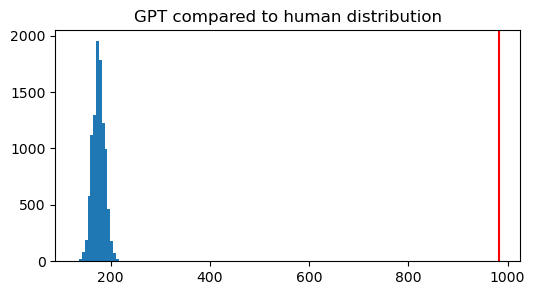

In [398]:
        fig, axes = plt.subplots(1, 1, figsize=(6, 3))
        axes.hist(number_of_significant_tests, 16)
        axes.set_title('GPT compared to human distribution')
        plt.axvline(x=983, color='r')
#     plt.axvline(x=row['GPT Continuous Temp .5'], color='y')
#     plt.axvline(x=row['GPT Continuous Temp 1'], color='c')
#    plt.savefig(row[0]+'.png')
        plt.show()

131
222


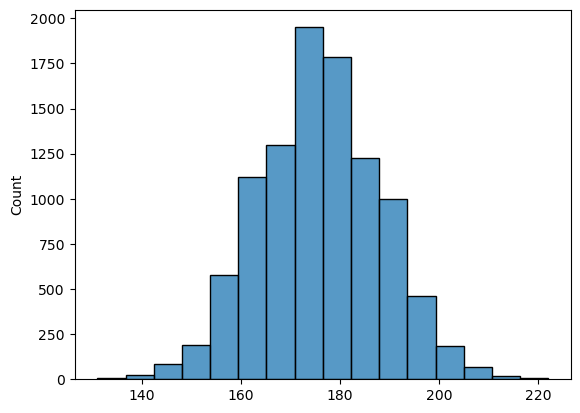

In [401]:
sns.histplot(data=number_of_significant_tests, bins=16)
print(min(number_of_significant_tests))
print(max(number_of_significant_tests))

In [428]:
random_subjects = pd.DataFrame(all_words_and_measures['Stim'])

for j in range(0,10000):
    for i in range(len(all_words_and_measures)):
        random_subjects.at[i, j] = random.randrange(5)

random_subjects

,Stim,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,the dog puppy.,1.0,3.0,2.0,1.0,4.0,2.0,1.0,0.0,1.0,...,0.0,4.0,4.0,4.0,1.0,2.0,2.0,0.0,2.0,0.0
1,the baby teeth.,1.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,2.0,...,4.0,2.0,3.0,1.0,1.0,0.0,3.0,3.0,1.0,4.0
2,the dress summer.,3.0,1.0,3.0,0.0,0.0,0.0,4.0,1.0,0.0,...,4.0,0.0,2.0,3.0,1.0,2.0,4.0,3.0,0.0,0.0
3,the boot car.,4.0,4.0,4.0,3.0,1.0,3.0,1.0,2.0,0.0,...,0.0,1.0,0.0,2.0,0.0,2.0,2.0,3.0,2.0,3.0
4,the pig truck.,1.0,0.0,2.0,0.0,3.0,4.0,3.0,3.0,3.0,...,4.0,3.0,1.0,4.0,0.0,1.0,4.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,the goat cheese.,4.0,0.0,0.0,0.0,2.0,0.0,1.0,3.0,3.0,...,2.0,3.0,4.0,0.0,1.0,4.0,2.0,2.0,1.0,2.0
2156,the sand beach.,2.0,2.0,3.0,0.0,0.0,4.0,4.0,0.0,2.0,...,2.0,4.0,0.0,4.0,2.0,2.0,4.0,0.0,3.0,3.0
2157,the mouth pig.,3.0,3.0,1.0,2.0,1.0,3.0,2.0,4.0,2.0,...,4.0,0.0,0.0,4.0,2.0,1.0,3.0,3.0,2.0,0.0
2158,the field flower.,2.0,3.0,1.0,0.0,2.0,4.0,2.0,3.0,2.0,...,4.0,3.0,2.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0


In [ ]:
p_value = .05

min_value = 0
max_value = 4

number_of_significant_tests_perm_distribution = []

def TestPermDistributions(df):
    for i in range(0,10000):
        all_pairs_and_pvalues = {}
        significant_pairs = {}
        for index, row in df.iterrows():
            mean = row['Humans Continuous']
            std = row['SD']
            case = row[i]
            stim = row['Stim']
            distribution_index = all_words_and_measures['Distribution'][int(index)]
        
#             if std == 0:
#                 min_in_standard_domain = (min_value - mean)
#                 max_in_standard_domain = (max_value - mean)
#             else:
#                 min_in_standard_domain = (min_value - mean) / std
#                 max_in_standard_domain = (max_value - mean) / std
    
#             min_in_erf_domain = special.erf(min_in_standard_domain)
#             max_in_erf_domain = special.erf(max_in_standard_domain)
    
#             random_uniform_data = np.random.uniform(min_in_erf_domain, max_in_erf_domain, 10000)
#             random_gaussianized_data = (special.erfinv(random_uniform_data) * std) + mean
    
#             random_gaussianized_data = np.around(random_gaussianized_data,0)
    
            p_obs = CrawfordTest(case, distribution_index)
        
#             print(stim, CrawfordTest(case, random_gaussianized_data))
#             fig, axes = plt.subplots(1, 1, figsize=(6, 3))
#             axes.hist(random_gaussianized_data, 5, range=(0,4))
#             axes.set_title(stim)
#             plt.axvline(x=case, color='r')
# #     plt.axvline(x=row['GPT Continuous Temp .5'], color='y')
# #     plt.axvline(x=row['GPT Continuous Temp 1'], color='c')
# #    plt.savefig(row[0]+'.png')
#             plt.show()
    
            all_pairs_and_pvalues.update({stim:p_obs})
    
            if p_obs < p_value:
                significant_pairs.update({stim:p_obs})
                continue
            else:
                pass
    
#         print('processing case: ', i)    
#         print(len(significant_pairs))
        number_of_significant_tests_allpairs.append(len(significant_pairs))
        print(len(number_of_significant_tests))